## Unsupervised Analysis of Days of Week

Treating crossings each day as features to learn about the relationships between various days.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get data

In [2]:
from jupyterworkflow.data import get_fremont_data

In [3]:
data = get_fremont_data()

In [4]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


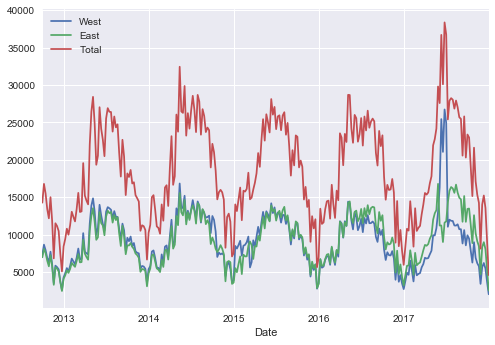

In [5]:
data.resample('W').sum().plot()

(0, 1059460.05)

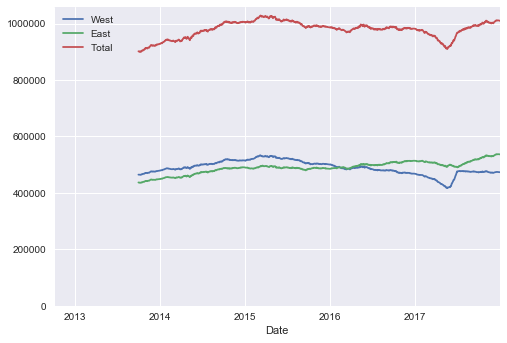

In [6]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

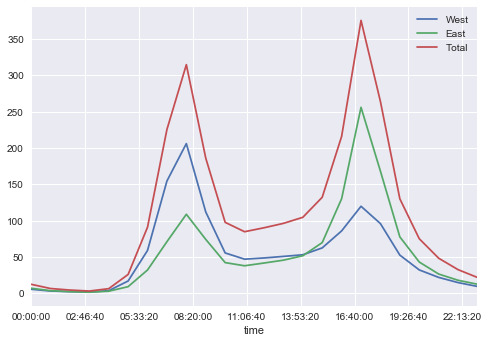

In [7]:
data.groupby(data.index.time).mean().plot()

In [8]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


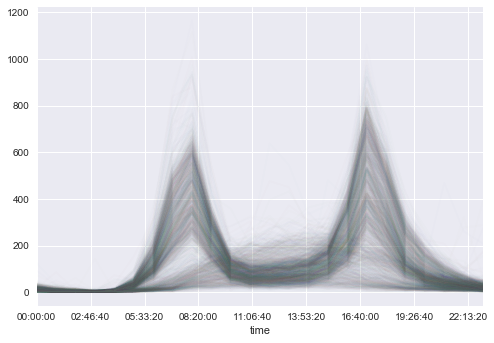

In [9]:
pivoted.plot(legend=False, alpha=0.01)

In [10]:
get_fremont_data??

## Principal component analysis

In [11]:
X = pivoted.fillna(0).T
print(X.head())

            00:00:00  01:00:00  02:00:00  03:00:00  04:00:00  05:00:00  \
2012-10-03      13.0      10.0       2.0       5.0       7.0      31.0   
2012-10-04      18.0       3.0       9.0       3.0       8.0      26.0   
2012-10-05      11.0       8.0       7.0       4.0       9.0      25.0   
2012-10-06      15.0      15.0       9.0       3.0       5.0       5.0   
2012-10-07      11.0      17.0       3.0       6.0       3.0       9.0   

            06:00:00  07:00:00  08:00:00  09:00:00    ...     14:00:00  \
2012-10-03     155.0     352.0     437.0     276.0    ...        128.0   
2012-10-04     142.0     319.0     418.0     241.0    ...        119.0   
2012-10-05     105.0     319.0     370.0     212.0    ...        125.0   
2012-10-06      27.0      33.0     105.0     114.0    ...        203.0   
2012-10-07      17.0      26.0      69.0     103.0    ...        241.0   

            15:00:00  16:00:00  17:00:00  18:00:00  19:00:00  20:00:00  \
2012-10-03     164.0     315.0     5

In [12]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [13]:
X2.shape

(1916, 2)

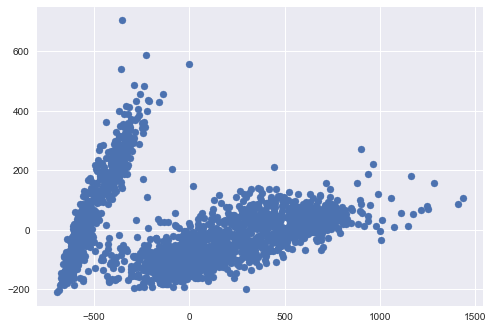

In [14]:
plt.scatter(X2[:, 0], X2[:, 1])

## unsupervised clustering

In [15]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

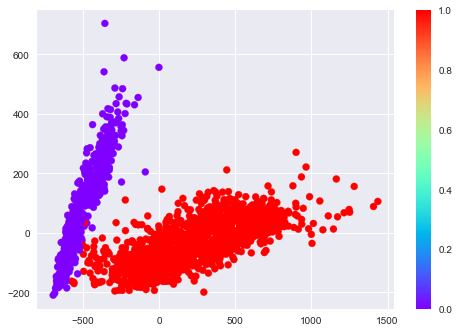

In [16]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

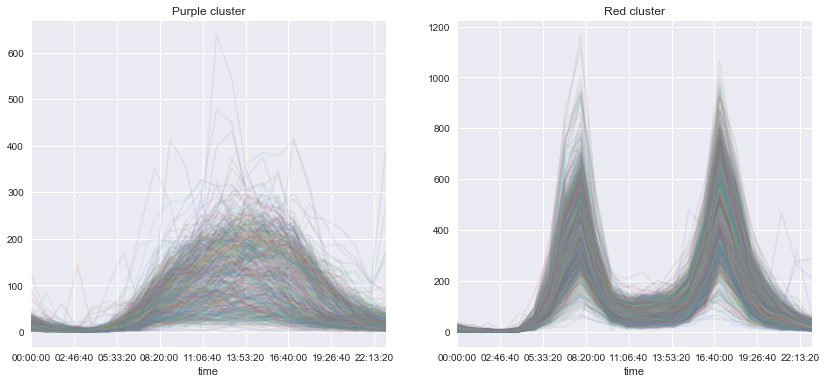

In [17]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Purple cluster')
ax[1].set_title('Red cluster')

## Comparing with day of week

In [18]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

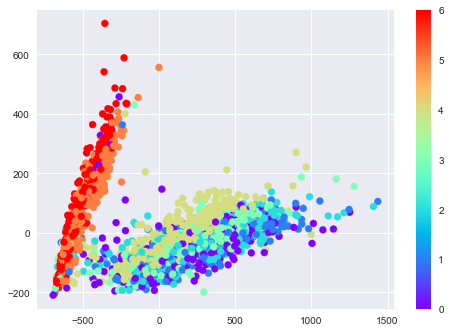

In [19]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing outliers

The following points are weekdays with a holiday-like pattern

In [20]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2017-12-14', '2017-12-15', '2017-12-18', '2017-12-19',
               '2017-12-20', '2017-12-21', '2017-12-22', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', length=1320, freq=None)

February 6th [snow storm](https://weather.com/storms/winter/news/winter-storm-maya-northwest-midwest-northeast-snow-ice-early-february-2017)